# Chapter 19 - RNNs using SimpleRNN and GRU

## Listing 19-1. Importing the data

In [1]:
import keras
import pandas as pd

from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)
del zip_file


## Listing 19-2. Keep only temperature data


In [2]:
df = df[['T (degC)']]


## Listing 19-3. Apply a MinMaxScaler

In [3]:
# apply a min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['T'])


## Listing 19-4. Preparing the sequence data

In [4]:
ylist = list(df['T'])

n_future = 72
n_past = 3*72
total_period = 4*72

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []
while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

# converting list of lists to numpy array
import numpy as np
X_new = np.array(X_new)
y_new = np.array(y_new)


## Listing 19-5. Splitting train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)


## Listing 19-6. Reshape the data to be recognized by keras

In [6]:
batch_size = 32

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )


## Listing 19-7. Parametetrize a small network with SimpleRNN

2025/05/27 18:06:47 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.9.2, but the installed version is 3.10.0. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/27 18:06:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/27 18:06:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/27 18:06:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/opt/anaconda3/envs/chapter18-20/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 72)             │           648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728 (2.84 KB)

 Trainable params: 728 (2.84 KB)

 Non-trainable params: 0 (0.00 B)

2025/05/27 18:06:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5397417de52c42db8044e85219dbabdc', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/5
7039/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - val_loss: 0.0461 - val_mean_absolute_error: 0.0461
Epoch 2/5
7034/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - val_loss: 0.0452 - val_mean_absolute_error: 0.0452
Epoch 3/5
7036/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - val_loss: 0.0446 - val_mean_absolute_error: 0.0446
Epoch 4/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.0432 - val_mean_absolute_error: 0.0432
Epoch 5/5
7038/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 64s 9ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
0.7169592031567258


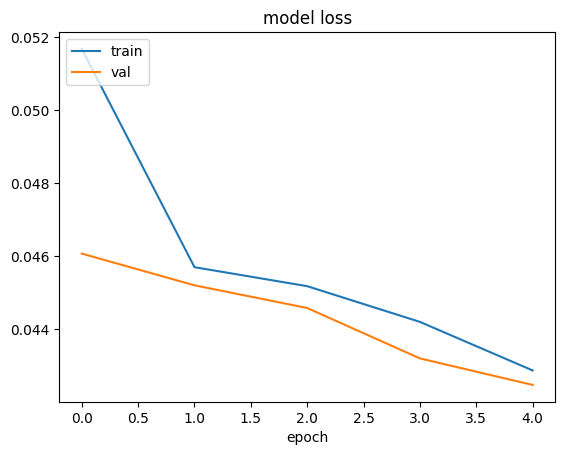

In [7]:
import random
random.seed(42)

import mlflow
mlflow.autolog()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

simple_model = Sequential([
  SimpleRNN(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])


simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

from sklearn.metrics import r2_score
print(r2_score(preds, y_test))

import matplotlib.pyplot as plt
plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Listing 19-8. A more complex network with three layers of SimpleRNN

/opt/anaconda3/envs/chapter18-20/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 216, 32)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 216, 32)        │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 72)             │         2,376 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,624 (29.78 KB)

 Trainable params: 7,624 (29.78 KB)

 Non-trainable params: 0 (0.00 B)

2025/05/27 18:12:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c40975baf4864cbca2f0adf38dd3469a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/5
7039/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0498 - mean_absolute_error: 0.0498  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 271s 38ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - val_loss: 0.0389 - val_mean_absolute_error: 0.0389
Epoch 2/5
7039/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0328 - mean_absolute_error: 0.0328  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 267s 38ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - val_loss: 0.0354 - val_mean_absolute_error: 0.0354
Epoch 3/5
7039/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0324 - mean_absolute_error: 0.0324  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 267s 38ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 4/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 269s 38ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 5/5
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 276s 39ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step
0.8953956581935915


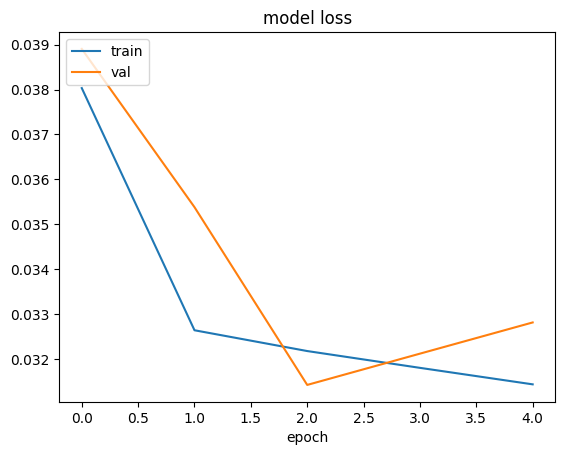

In [8]:
random.seed(42)

simple_model = Sequential([
  SimpleRNN(32, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(32, activation='tanh', return_sequences = True),
  SimpleRNN(32, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Listing 19-9. A simple architecture with 1 GRU layer

/opt/anaconda3/envs/chapter18-20/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 72)             │           648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 912 (3.56 KB)

 Trainable params: 912 (3.56 KB)

 Non-trainable params: 0 (0.00 B)

2025/05/27 18:35:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '97e6040a61ac4280902b73e751c46974', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
7038/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0522 - mean_absolute_error: 0.0522  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 163s 23ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - val_loss: 0.0446 - val_mean_absolute_error: 0.0446
Epoch 2/10
7038/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0408 - mean_absolute_error: 0.0408  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 160s 23ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 3/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0283 - mean_absolute_error: 0.0283  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 159s 23ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 4/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 157s 22ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 5/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 155s 22ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 6/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275
Epoch 7/10
7039/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0274 - mean_absolute_error: 0.0274  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 157s 22ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 8/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 161s 23ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0270 - val_mean_absolute_error: 0.0270
Epoch 9/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0268 - mean_absolute_error: 0.0268  

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 159s 23ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267
Epoch 10/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 158s 22ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step
0.9277910584938476


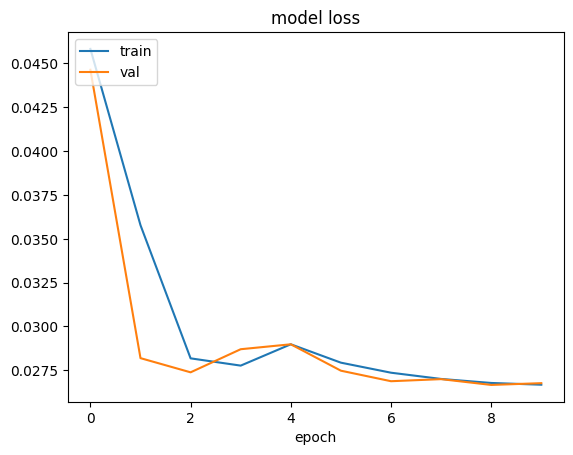

In [9]:
random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
   GRU(8, activation='tanh',input_shape=(n_timesteps, n_features)),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Listing 19-10. A more complex network with three layers of GRU

/opt/anaconda3/envs/chapter18-20/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 216, 64)        │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 216, 64)        │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 72)             │         4,680 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,464 (263.53 KB)

 Trainable params: 67,464 (263.53 KB)

 Non-trainable params: 0 (0.00 B)

2025/05/27 19:02:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a18178b7f71a484fab0a2bda7d914c45', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0455 - mean_absolute_error: 0.0455   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1034s 147ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278
Epoch 2/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 0.0275 - mean_absolute_error: 0.0275   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1736s 247ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 3/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 0.0265 - mean_absolute_error: 0.0265   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1201s 171ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0257 - val_mean_absolute_error: 0.0257
Epoch 4/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1128s 160ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260
Epoch 5/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.0251 - mean_absolute_error: 0.0251     

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1306s 185ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 6/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0246 - mean_absolute_error: 0.0246   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1039s 148ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238
Epoch 7/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.0240 - mean_absolute_error: 0.0240   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1163s 165ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238
Epoch 8/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0237 - mean_absolute_error: 0.0237   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1041s 148ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227
Epoch 9/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0233 - mean_absolute_error: 0.0233   

7040/7040 ━━━━━━━━━━━━━━━━━━━━ 1008s 143ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 10/10
7040/7040 ━━━━━━━━━━━━━━━━━━━━ 981s 139ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
4334/4334 ━━━━━━━━━━━━━━━━━━━━ 127s 29ms/step
0.9382123248302017


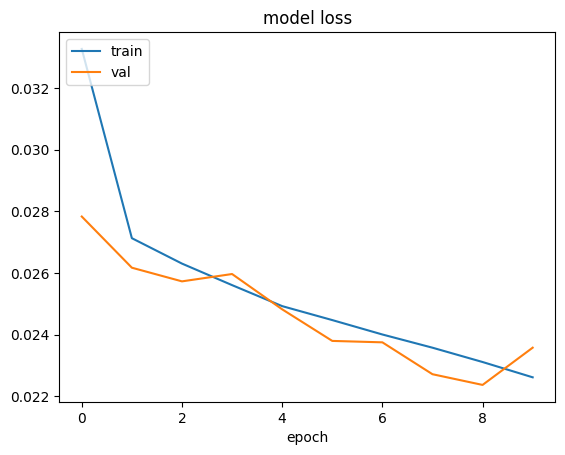

In [10]:
random.seed(42)

simple_model = Sequential([
   GRU(64, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
    GRU(64, activation='tanh', return_sequences=True),
    GRU(64, activation='tanh'),
  Dense(y_train.shape[1]),
])

simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
)

preds = simple_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
